#### 以SQL获取需要数据：
``` sql
SELECT c.year,c.city,c.country,c.avg_temp as avg_cd,g.avg_temp as avg_temp_gloab
FROM city_data c 
JOIN global_data g on c.year=g.year
WHERE c.city='Chengdu'
--AND c.avg_temp is not null 因为时间是continous data
```

In [1]:
#本次采用原始表数据下载保存为csv格式，用pandas工具来进行数据筛选和整理
#引入相应module
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读取city_data.csv
df = pd.read_csv('city_data.csv')
df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [3]:
#查询离自己最近地方的城市数据
df[df["country"]=="China"].groupby('city').nunique()

chengdu_data = df[(df["city"]=="Chengdu")&(df["country"]=="China")]
chengdu_data.head()

,year,city,country,avg_temp
14913,1820,Chengdu,China,9.14
14914,1821,Chengdu,China,10.29
14915,1822,Chengdu,China,10.39
14916,1823,Chengdu,China,10.68
14917,1824,Chengdu,China,NaN


In [4]:
chengdu_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 14913 to 15106
Data columns (total 4 columns):
year        194 non-null int64
city        194 non-null object
country     194 non-null object
avg_temp    184 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ KB


In [8]:
#查看avg_temp为空的行
chengdu_data[chengdu_data['avg_temp'].isnull()]

,year,city,country,avg_temp
14917,1824,Chengdu,China,NaN
14918,1825,Chengdu,China,NaN
14919,1826,Chengdu,China,NaN
14920,1827,Chengdu,China,NaN
14921,1828,Chengdu,China,NaN
14922,1829,Chengdu,China,NaN
14923,1830,Chengdu,China,NaN
14924,1831,Chengdu,China,NaN
14925,1832,Chengdu,China,NaN
14932,1839,Chengdu,China,NaN


In [10]:
#发现1824年到1839年，成都的平均气温值为空，所以舍弃掉1839年以前的数据，从1840年开始
chengdu_data = chengdu_data[chengdu_data['year'] >= 1840]
chengdu_data.head()

,year,city,country,avg_temp
14933,1840,Chengdu,China,10.00
14934,1841,Chengdu,China,9.83
14935,1842,Chengdu,China,10.24
14936,1843,Chengdu,China,10.33
14937,1844,Chengdu,China,10.03


In [11]:
#读取全球数据
global_data = pd.read_csv('global_data.csv')
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [12]:
#将chengdu_data 与 global_data以year进行合并
result = pd.merge(chengdu_data,global_data,on=['year','year'])

In [13]:
result.head()
result = result.rename(columns=({'avg_temp_x':'avg_temp_cd','avg_temp_y':'avg_temp_global'}))

In [14]:
result.head()

,year,city,country,avg_temp_cd,avg_temp_global
0,1840,Chengdu,China,10.00,7.80
1,1841,Chengdu,China,9.83,7.69
2,1842,Chengdu,China,10.24,8.02
3,1843,Chengdu,China,10.33,8.17
4,1844,Chengdu,China,10.03,7.65


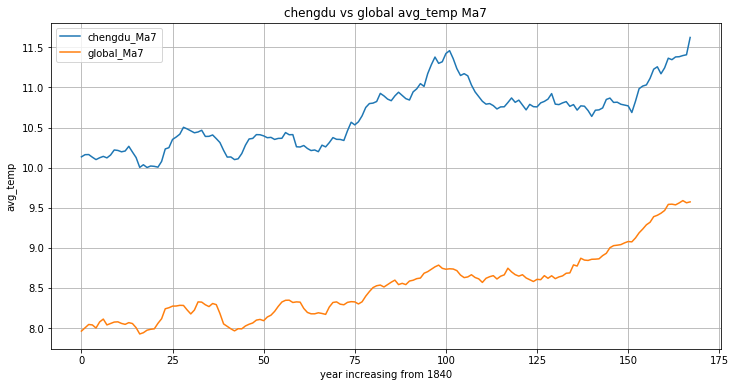

In [23]:
#画出移动平均线
plt.rcParams['axes.unicode_minus'] = False
df['chengdu_Ma7'] = result['avg_temp_cd'].rolling(window=7).mean().shift(-6)
df['global_Ma7'] = result['avg_temp_global'].rolling(window=7).mean().shift(-6)
df[['chengdu_Ma7','global_Ma7']].plot(subplots=False, figsize=(12,6), grid=True)
plt.ylabel('avg_temp')
plt.xlabel('year increasing from 1840')
plt.title('chengdu vs global avg_temp Ma7')
plt.show()

- 与全球平均气温相比，我所在城市（成都）平均气温更高，这种气温差异基本一致。
- 长期以来，我所在城市气温变化与全球平均气温变化走势基本一致。
- 气温变化整体趋势越来越热，气温的走向于过去几百年走向都是呈上升趋势。
- 就成都平均气温走势而言，最近今年成都平均气温持续增高，预测未来不久，平均气温将突破12度。